<a href="https://colab.research.google.com/github/ChetanyaLahari/VOIS_AICTE_Oct2025_MajorProject_MadisettyChetanyaLahari/blob/main/NetflixEDA_majorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
=== Dataset Overview ===
(7789, 11)
['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None
         

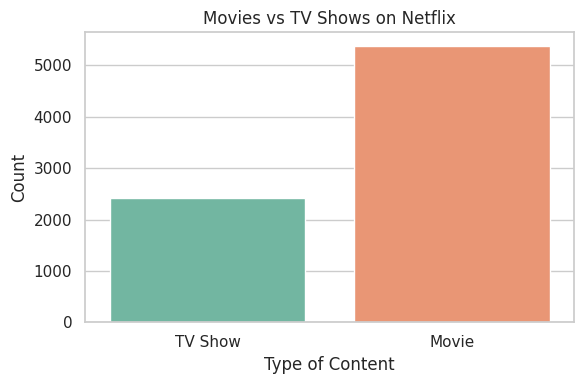

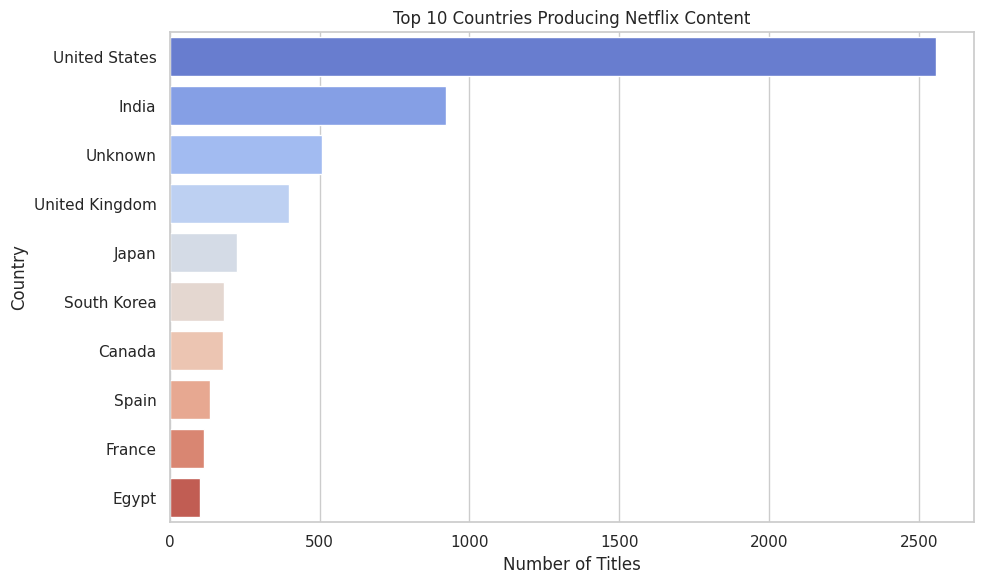

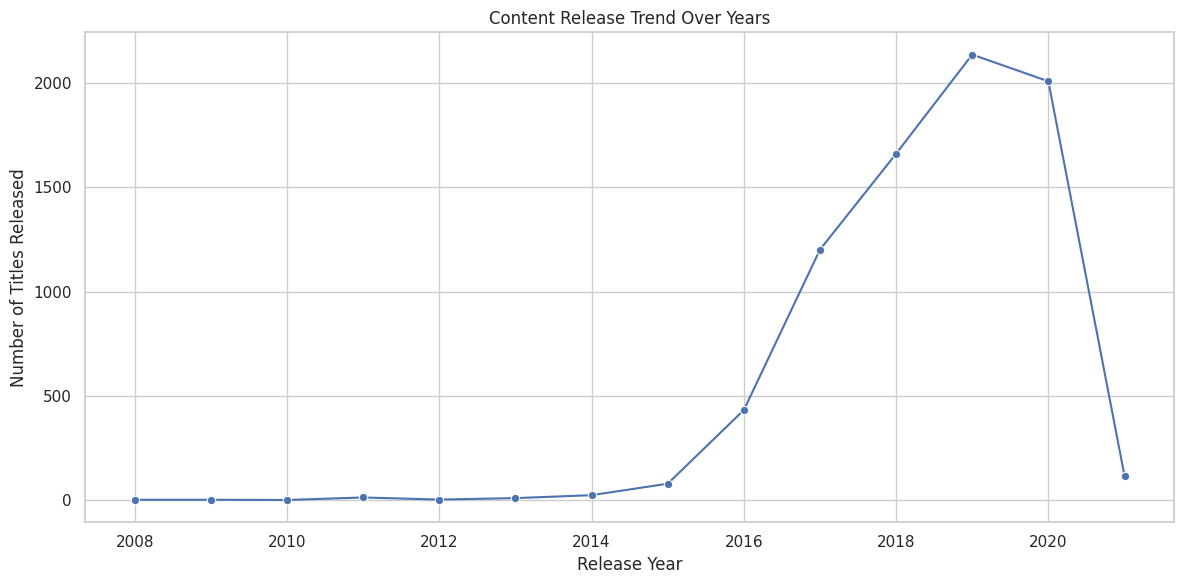

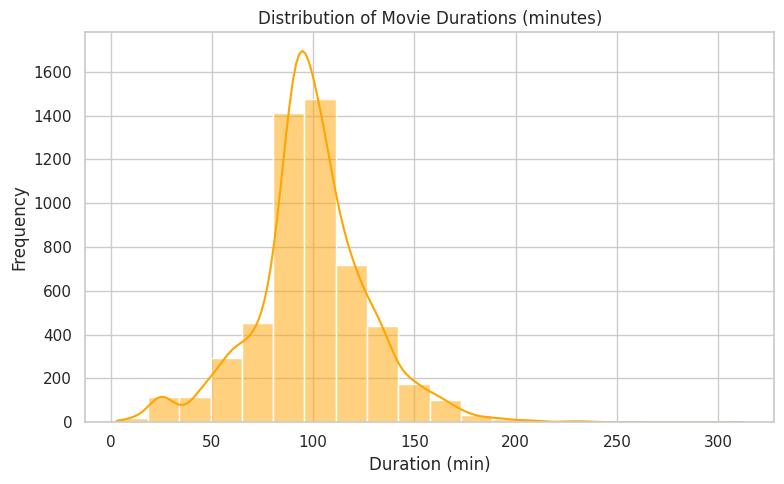

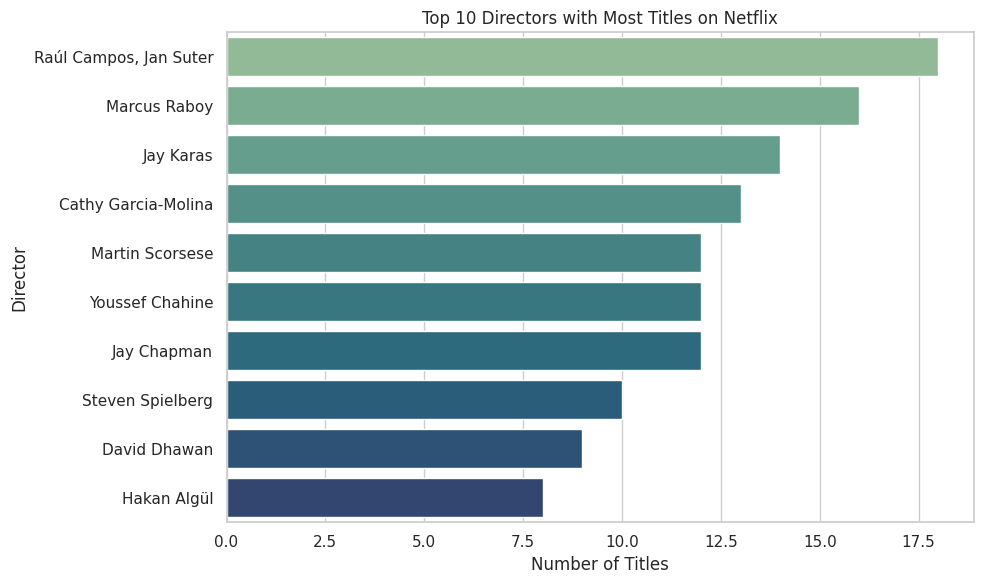

EDA Completed Successfully


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

sns.set(style="whitegrid")
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Netflix Dataset.csv'
df = pd.read_csv(file_path)

print("=== Dataset Overview ===")
print(df.shape)
print(df.columns.tolist())
print(df.info())
print(df.describe(include='all').transpose().head())

cols = {c.lower().strip(): c for c in df.columns}
def pick(*cands):
    for c in cands:
        k = c.lower().strip()
        if k in cols:
            return cols[k]
    return None

COL_TYPE = pick('category','type')
COL_COUNTRY = pick('country')
COL_DIRECTOR = pick('director')
COL_CAST = pick('cast')
COL_RATING = pick('rating')
COL_RELEASE_DT = pick('release_date','date_added')
COL_LISTED_IN = pick('listed in','listed_in','genres','genre')
COL_DURATION = pick('duration')
COL_TITLE = pick('title')

df = df.drop_duplicates().copy()
fill_text = {}
if COL_COUNTRY: fill_text[COL_COUNTRY] = 'Unknown'
if COL_DIRECTOR: fill_text[COL_DIRECTOR] = 'Not Specified'
if COL_CAST: fill_text[COL_CAST] = 'Not Specified'
if fill_text:
    df = df.assign(**{c: df[c].fillna(v) for c, v in fill_text.items()})
if COL_RATING:
    if not df[COL_RATING].dropna().empty:
        mode_val = df[COL_RATING].mode(dropna=True)
        mode_val = mode_val.iloc[0] if not mode_val.empty else 'Unknown'
        df[COL_RATING] = df[COL_RATING].fillna(mode_val)
    else:
        df[COL_RATING] = df[COL_RATING].fillna('Unknown')
if COL_RELEASE_DT:
    df[COL_RELEASE_DT] = pd.to_datetime(df[COL_RELEASE_DT], errors='coerce')
    df['Year'] = df[COL_RELEASE_DT].dt.year
else:
    df['Year'] = pd.NA

print("\n=== After Cleaning (null counts) ===")
print(df.isnull().sum())
print(df.info())

if COL_TYPE:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=COL_TYPE, hue=COL_TYPE, palette='Set2', legend=False)
    plt.title("Movies vs TV Shows on Netflix")
    plt.xlabel("Type of Content")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

if COL_COUNTRY:
    top_countries = df[COL_COUNTRY].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_countries.values,
        y=top_countries.index,
        hue=top_countries.index,
        palette='coolwarm',
        legend=False
    )
    plt.title("Top 10 Countries Producing Netflix Content")
    plt.xlabel("Number of Titles")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

if 'Year' in df.columns and df['Year'].notna().any():
    yearly = df['Year'].dropna().astype(int).value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=yearly.index, y=yearly.values, marker='o')
    plt.title("Content Release Trend Over Years")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles Released")
    plt.tight_layout()
    plt.show()

if COL_LISTED_IN:
    genres = df[COL_LISTED_IN].dropna().astype(str).str.split(', ')
    all_genres = genres.explode()
    top_genres = all_genres.value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_genres.values,
        y=top_genres.index,
        hue=top_genres.index,
        palette='mako',
        legend=False
    )
    plt.title("Top 10 Popular Genres on Netflix")
    plt.xlabel("Number of Titles")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()

if COL_TYPE and COL_DURATION:
    movies = df[df[COL_TYPE].str.lower() == 'movie'].copy()
    movies['Duration_min'] = movies[COL_DURATION].astype(str).str.extract(r'(\d+)').astype(float)
    plt.figure(figsize=(8, 5))
    sns.histplot(movies['Duration_min'].dropna(), bins=20, kde=True, color='orange')
    plt.title("Distribution of Movie Durations (minutes)")
    plt.xlabel("Duration (min)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

if COL_DIRECTOR:
    top_directors = (
        df[COL_DIRECTOR]
        .replace('Not Specified', pd.NA)
        .dropna()
        .value_counts()
        .head(10)
    )
    if not top_directors.empty:
        plt.figure(figsize=(10, 6))
        sns.barplot(
            x=top_directors.values,
            y=top_directors.index,
            hue=top_directors.index,
            palette='crest',
            legend=False
        )
        plt.title("Top 10 Directors with Most Titles on Netflix")
        plt.xlabel("Number of Titles")
        plt.ylabel("Director")
        plt.tight_layout()
        plt.show()

print("EDA Completed Successfully")
